<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

Experiments of this week:
- experiment 12A: Simulate and build a non-inverting opamp
- experiment 12B: Simulate and build an inverting opamp
- experiment 12C: Build a current to voltage converter and understand how it works

Goal: In these experiments we will explore the basic OPAMP circuits and learn about the photodiode. There are two basic OPAMP circuits, the inverting and the non-inverting amplifier, most other OPAMP based circuits are derived from these two circuits. These circuits work for both AC and DC signals. During the experiments we will see what the difference is between AC-coupling and DC-coupling of signals, as well.
OPAMPs are very often used in conjunction with sensors. Example of a sensor, often used in biochemical systems, is the photodiode. The photodiode is sensitive to light. It can be read out in two different modes; voltage mode and current mode. In voltage mode it will act as a “solar cell”, this gives with low light intensity already a voltage. However, the voltage mode is not linear. When used as an intensity sensor, with high linearity, the current mode is more suited. In order to convert the photocurrent to a voltage, a circuit with an OPAMP is used, the current to voltage converter.


Structure of an experiment:
- Background+Anticipate+ Simulate(5+20+10):  per person
- Implement + Investigate(60):  with your partner (group of 2)
- Compare + Conclude(15):  with a group of 4 (per table)

#  12B: Inverting amplifier
> <font color='blue'>Learning goal:</font> Calculate and explain some properties of an inverting amplifier circuit. Build the circuit and observe it in real life.

* Extra information or hints is given in boxes denoted by: <font size=4>ℹ️</font>
* Help fixing progrems is given in boxed denoted by: <font size=4>🔥</font>

Materials used:
- Alpaca
- opamp TL072
- 220 and 1k $\Omega$ resistors



## BACKGROUND
> <font color='grey'>⏳ Estimated time: 5 min</font>

Below is an inverting amplifier circuit is depicted

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi8_2_circuit_with_pins.jpg" width="75%"/>
</div>

In the above circuit, the + (non-inverting) input is connected to ground. Because of (ideal) opamp characteristics, the - (inverting) input will be a **virtual ground point**. 
<br>

In an ideal opamp, the voltage difference between the inverting and non-inverting inputs is virtually zero. Thus, if the non-inverting input is grounded, the inverting input also appears to be at ground potential, even though there is no physical connection to ground.
<br>    

Due to the virtual ground, the voltage across Rb is Vsource, and the voltage across Ra, it is Vout, so (as per Ohm's law) the current through Rb and Ra is equal. 
- The current through Rb will be Vsource/Rb, and Vout is the same current times Ra, but with a minus sign. 
- The sign change is due to $I=(V_{in}-V_{virtual ground})/R_{b} = (V_{virtual ground}-V_{out})/R_{a}$. 

*Can you now calculate the gain?*


## ANTICIPATE: 
> <font color='grey'>⏳ Estimated time: 20 min</font>

Calculate the gain of the above circuit. Clearly state the formula you used to calculate the gain.

In [ ]:
### TO DO="# write your answer here: gain formula+ calculation"


If you apply a sine between 0 and 1 V, what would be the Vout?<br>
Reason whether you can directly measure this Vout with the analog Input Pin. <br>
In doubt: check with your TA before connecting, and **always use the Voltmeter on the Cria first.**

In [ ]:
### TO DO="# write your answer here: Vout + safe to connect?"


If the operational amplifier is assumed to be ideal, what are the input and output impedance?


In [ ]:
### TO DO="# write your answer here: input and output impedance opamp"


## SIMULATE: 
> <font color='grey'>⏳ Estimated time: 10 min</font>

Recreate the above inverting circuit in LTSpice, and observe Vin and Vout. Are they indeed inverting?<br>
Use the same simulation settigns as in 12A. Remember to power the opamp!<br>
Upload the screenshot of the graph and you setup.

In [ ]:
from ipywidgets import FileUpload
from IPython.display import Image
import os
upload=FileUpload()
upload


In [ ]:
file_name="12B_1_inverting_input.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, not working on Vocareum

Image(filename=file_name, width="50%")


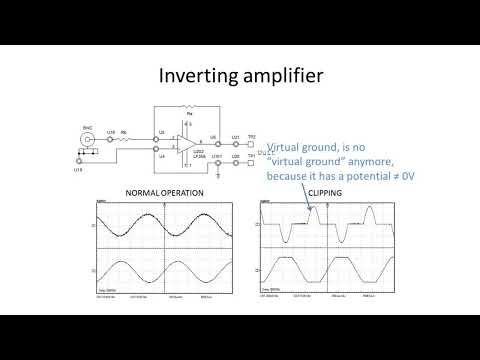

In [1]:
%python #  PRECAP VIDEO
from IPython.lib.display import YouTubeVideo
YouTubeVideo('i8DNapKYyXQ', width = 600, height = 450)

## IMPLEMENT & INVESTIGATE: 
> <font color='grey'>⏳ Estimated time: 60 min</font>

You will be building an measuring the characteristics of the inverting amplifier using the ALPACA.<br>
The pin diagram of the operational amplifier is given below as reminder: <br>
* The non-inverting input is marked with a (+)<br>
* and the inverting input with a (-).

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/7b873596c01a500f66c42c89508ee5aa384b6335/voltammetry/opamp_dual_layout+component.jpg" width="300"/>
</div>

### Exercise 1: build an inverting opamp circuit
<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>

Build the inverting amplifier circuit as depicted below
<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi8_2_circuit_with_pins.jpg" width="80%"/>
</div>

       
    
* Measure both the input signal that is generated with DAC output A, and the output of the opamp. 
* Use the amplifier (*AMP1 IN* and *AMP0 IN* pins) for measuring the analog signals, since these pins are protected against too high voltages.
* Connect the jumpers using the illustration below. This setup will not change the input signals, but simply protects the PicoPi.
* Remember to power your opamp!
    
> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Tip: Instead of using a jumper at *AMPLIFIER DIRECT TO NANO*, consider using a wire to bridge the connection instead. It is easier to place and remove!
>
> <font>  

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi8_3_neutral_amp_settings.jpg" width="500"/>
</div>
    
<details>
  <summary>Fritzing circuit</summary>
Your circuit should look somewhat like the built circuit below. Remeber that resistors in the image might not have correct colors. Note the jumpers in pink.
 
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi7_2_build.png" width="90%"/>
</details>
    
The code for this exercise has already been written and can be found below. The code generates a sine wave at 50 Hz with a $V_\text{PP}$ of 0.5 volt with Vmin = 0.
<br>    
<br>   
> <font size=6>🔥</font>  
>
> <font color='ff6723'>
>
> Before running the code, please verify that:
> * Both USB cables are plugged in
> * The _+12 V_ and _-12 V_ switches are turned to the on position on the ALPACA.
> * Resistors are in correct position! - doublecheck if they are correctly placed in relation to the inputs and outputs of an opamp
    
<br>
Try to predict what the output will look like.

In [ ]:
### TO DO="# the predicted output voltage"


In [ ]:
# Run this cell to connect your ALPACA
%serialconnect to --port="COM3"
#ADD COM PORT ABOVE, e.g. --port="COM3"

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from machine import ADC
from functiongenerator import FuncGen, Sine

# Do you know what these variables define?
NUM_SAMPLES = 200
DELAY_MS = 1 # Sampling delay in ms

# How would you figure out which ADC(??) ports to use?
adc0 = ADC(26)
adc1 = ADC(27)

# Remember to initialize the arrays to store the acquired data
input_signal = np.zeros(NUM_SAMPLES) #arrays
output_signal = np.zeros(NUM_SAMPLES)

# Define the procedure for the function generator and the acquisition
with FuncGen(Sine(Vmax=0.5, Vmin=0, freq=50)):
    time.sleep_ms(1000)
    for ii in range(NUM_SAMPLES):
        input_signal[ii] = adc1.read_u16()
        output_signal[ii] = adc0.read_u16()
        time.sleep_ms(DELAY_MS)

# Convert integer input/output signal to voltage.
input_signal = input_signal / 65535 * 3.3
output_signal = output_signal / 65535 * 3.3
print(np.max(input_signal), np.max(output_signal))
print('Aquisition done!')

In [ ]:
# Plot
plt.plot(input_signal, label='Input signal')
plt.plot(output_signal, label='Output signal')
plt.ylabel('signal [V]')
plt.xlabel('Measurement number')
plt.legend()

print('Plotting done!')

# Calculate Vpp for input/output and gain
Vpp_input = np.max(input_signal) - np.min(input_signal)
Vpp_output = np.max(output_signal) - np.min(output_signal)
gain = Vpp_output/Vpp_input

# Print the results of the calculations
print(f'The Vpp of the input signal is: {Vpp_input:.2f} V')
print(f'The Vpp of the output signal is: {Vpp_output:.2f} V')
print(f'The gain is {gain:.2f}')


### Exercise 2: No detectable output signal??
Explain why you do not detect an output signal?

> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Hint 1: To see if there is any output generated by the opamp, connect the signal at the output of the opamp to the voltmeter on the Cria. Lower output the frequency of the DAC to 1 Hz and observe the indicator leds. Do not forget to change the frequency back when you continue to the next question.
>
> <font>   
> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Hint 2: Think about Alpaca's limitations
>
> <font>   

In [ ]:
### TO DO="# write your answer here: why don't you get an output signal?"


### Exercise 3 Influence AC-DC coupling on output signal
Measure the output of the opamp both in AC and in DC coupling for *AMP0 IN*. 
    

Just like the in 12A, we can use the amplifier on the ALPACA to visualize signals which we could otherwise not observe. <br>
Similar to the scope in the studio classroom, we can switch between AC and DC coupling mode.

<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
    
* Use the jumper closest to the *SIGNAL+* pins of the amplifier to switch the *AMP0 IN* amplfier between the AC/DC coupling modes.
    * Note that this corresponds to the top jumper in blue circle in the illustration above showing the jumper settings. 
    * Having the jumper be on the pins sets the input to DC coupling, whilst having it off sets the input to AC coupling.

#### PART 1 - AC/DC coupling
       
**A)** In which mode do you see the signal? 
    
**B)** Deduce why AC and DC coupling result in their corresponding signals.

In [ ]:
### TO DO="# write your answer here: influence AC and DC mode"


**C)** Why does the signal appear to have a 180 degree phase shift compared to the input signal?

In [ ]:
### TO DO ="# write your answer here: explain phase shift"


<br>
<br>
You can use one more trick to visualize the output signal more clearly. You can apply a DC offset to the output signal before measuring it. 
<br>

#### PART 2 - DC offset

<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
* For this purpose connect a jumper over the pins called: *WITH OFFSET*, on the amplifier corresponding to *AMP0 IN*. See the image below for the correct jumper settings.
* The jumpers for *AMP1 IN* should not be changed.
* Put *AMP0 IN* in DC coupling mode again.

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi8_4_offset_jumper.jpg" width="50%"/>
</div>

The potentiometer above AMP0 IN can now be used to regulate the DC offset that is added to the signal. <br>
Regulate the DC offset of the signal such that the entire output signal can now be visualized. To make it easy to find the right setting for the potentiometer, you can use a special plotting mode unique to NB2211 that allows you to plot the data live. <br>
This function is called `plt.liveplot`. When a number is put into `plt.liveplot`, e.g. `plt.liveplot(x)`, the value `x` will be added as a point on the plot. Note: this only works if the cell containing `plt.liveplot` starts with the "magic command" `%plot --mode live`
    
> <font size=6>🔥</font>  
>
> <font color='ff6723'>
>
> **WARNING** There is a bug in the Firefox browser that makes the plot flicker. If you are sensitive to this: **BE CAREFUL**
> * For most people the flicker is really annoying anyways. Switching to any other browser will resolve this.
> * The following browsers are have been tested and have been shown to produce smooth images: Edge (Windows), Safari (macOS).
    
<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
* Use the live plot to acquire the full signal. Turning the potentiometer clockwise will increase the DC offset, turning it counter-clockwise will lower the DC offset.
    * The range is finicky, so you will need to adjust carefully

* Measure the gain using the (non-live) code you used at Exercise 2.

In [ ]:
%serialconnect to --port="COM3" 
#ADD COM PORT ABOVE, e.g. --port="COM3"

In [ ]:

%plot --mode live

import time
import numpy as np
import matplotlib.pyplot as plt
from machine import ADC
from functiongenerator import FuncGen, Sine

# Instantiate two measurement pints, one for Ain0 the other for Ain1 to measure the input and output signal
adc0 = ADC(26) 
adc1 = ADC(27)

with FuncGen(Sine(Vmax=0.5, Vmin=0, freq=1)):
    
    time.sleep_ms(100)
    
    for ii in range(400):
        input_signal = adc1.read_u16()
        output_signal = adc0.read_u16()
        input_signal = input_signal / 65535 * 3.3
        output_signal = output_signal / 65535 * 3.3
        plt.liveplot(input_signal , output_signal, labels = ['Input', 'Output'])
        time.sleep_ms(100)

### Exercise 4: Measure + evaluate the gain

**THINK:**
1. Use the new knowledge from the setup in exercise 3.
2. Do you need to put back the jumper to switch from AC and DC coupling mode?
3. When fine tuning the offset, what should you bear in mind about the lower and the upper limit of the observed signal?

Now:

**A)** Measure the gain (use non-live code from ex 2)

**B)** Reflect back on the answer you gave in Exercise 3C, was this answer correct? 



In [ ]:

### TO DO="write your answer here: measured gain + reflection"



This opamp circuit you built can be used to **amplify** signals, as you saw during this exercise, but it can also be used to **attenuate** signals. This attenuation is similar to the amplifier circuit we used in the non-inverting opamp exercise to measure the clipped signal. Attenuating a signal is useful because the PicoPi can only measure voltages from 0 to 3.3 volt. By attenuating a signal, we can measure voltages over a larger voltage range.

### Exercise 5: Adapt resistors for another gain value

#### PART 1 - adapt
How should the resistors be changed to **attenuate** the signal with a factor of 4.5? 

In [ ]:
### TO DO="# write your answer here: how to attentuate"


Implement the circuit you just suggested

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi8_1_attenuator_circuit.jpg" width="75%"/>
</div>

<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
* Keep the jumpers on the ALPACA amplifier *AMP0 IN* unchanged
* Remove the wire connecting *AMP1 IN*. It will not be used.
* Remove the jumper for *ADC1* at *AMPLIFIER DIRECT TO NANO*. 
* Instead of using the output from *DAC A* directly, use the *DAC ASSISTANT*. 
    * Connect a wire from DAC output A to the *+IN pin* of the DAC assistant. 
    * Connect the output from the *OUT* pin of the DAC assistant to the input of the opamp circuit
* Select the resistors based on your answer.

> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Hint: your circuit should look somewhat like the built circuit below. Note the jumpers in pink. Remeber that resistors shown on the graphic might not be correct.
>
> <font>   
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi7_6_build.png" width="90%"/>

The  signal generated at the output of the DAC assistant now has an amplitude running from +4.8 to -4.8 V. This 9.6 volt peak to peak amplitude is too large to measure directly with the PicoPi, so we need to **attenuate** it first. This should be done using your opamp circuit. 
    
#### PART 2 - adapt

<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
* Acquire the entire signal generated using the live plotter below
* Observe whether you can still use the offset knob. Do you need it?
* Perform the measurement and find the gain using the code below.
    
#### Live plotter:

In [ ]:
%serialconnect to --port="COM3" 
#ADD COM PORT ABOVE, e.g. --port="COM3"

In [ ]:

%plot --mode live


import time
import numpy as np
import matplotlib.pyplot as plt
from machine import ADC
from functiongenerator import FuncGen, Sine

# Instantiate two measurement pints, one for Ain0 the other for Ain1 to measure the input and output signal
adc0 = ADC(26) 

with FuncGen(Sine(Vmin=1.1, Vmax=3, freq=1)):
    
    time.sleep_ms(100)
    
    for ii in range(200):
        output_signal = adc0.read_u16()
        output_signal = output_signal / 65535 * 3.3
        plt.liveplot(output_signal, labels = ['Output'])
        time.sleep_ms(100)

#### Final acquisition:

In [ ]:


import time
import numpy as np
import matplotlib.pyplot as plt
from machine import ADC
from functiongenerator import FuncGen, Sine

# ACQUISITION SETTINGS
NUM_SAMPLES = 350
DELAY_US = 500 # Sampling delay in us

adc0 = ADC(26) 

output_signal = np.zeros(NUM_SAMPLES)

with FuncGen(Sine(Vmin=1.1, Vmax=3, freq=50)):
    
    time.sleep_ms(100)
    
    for ii in range(NUM_SAMPLES):
        output_signal[ii] = adc0.read_u16()
        time.sleep_us(DELAY_US)
        
# Convert integer input/output signal to voltage.
output_signal = output_signal / 65535 * 3.3

print('Aquisition done!')

In [ ]:
# Plot
plt.plot(output_signal, label='Output signal')
plt.ylabel('signal [V]')
plt.xlabel('Measurement number')
plt.legend()

print('Plotting done!')

# Calculate Vpp for input/output and gain
Vpp_input = 9.6
Vpp_output = np.max(output_signal) - np.min(output_signal)
gain = Vpp_output/Vpp_input

# Print the results of the calculations
print(f'The Vpp of the input signal is: {Vpp_input:.2f} V')
print(f'The Vpp of the output signal is: {Vpp_output:.2f} V')
print(f'The gain is 1/{1/gain:.2f}')

### Exercise 6: Measure full sign wave with Alpaca's on-board amplifier
**A)** Are you able to detect the entire sine wave? 

**B)** Comment on why using the amplifier on-board the ALPACA is still necessary for this measurement.

In [ ]:
### TO DO="# write your answer here: able to measure full sine, and is amplifier still necessary?"


## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 15 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 

**to be checked off by a TA:**

1. Discuss the various ways that one can measure a purely negative signal on the PicoPi. Which method will lead to what results?
* A. Directly on Analog in **hypothetically**
* B. Via AC/DC coupling of the amplifier
* C. with offset of the amplifier

2. Discuss why at Exercise 6 you still need the amplifier, although the $V_\text{PP}$ is in range of the PicoPi

3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved?

In [ ]:
#12B inverting opamp
### TO DO ="1. discuss the various ways to display a negative signal by the alpaca"

### TO DO ="2. why do you need an amplifier in exercise 6?"

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"


In [ ]:
%python # recording
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hR9duxRafQ4', width = 600, height = 450)